In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn import tree
from sklearn import metrics

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

In [1]:
wine_df = pd.read_csv('Datasets/winequality-red.csv', sep=';')

In [2]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
# A Mapping Dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [6]:
wine_df.loc[:,"quality"] = wine_df["quality"].map(quality_mapping)

In [7]:
# Let's Split the Data
wine_df = wine_df.sample(frac=1).reset_index(drop=True)

# Top 1000 rows are selected for training
wine_train = wine_df.head(1000)

# Bottom 599 Values are Selected For Testing/Validation
wine_test = wine_df.tail(599)

In [11]:
wine_df.columns[:-1].tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [12]:
# Initialize Decision Tree Classifier Class with a Max-Depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# Cols
cols = wine_train.columns[:-1].tolist()

# Train the model on the Provided Features and Mapped
clf.fit(wine_train[cols], wine_train['quality'])

DecisionTreeClassifier(max_depth=3)

In [13]:
# Generate predictions on the training set
train_predictions = clf.predict(wine_train[cols])

# Generate predictions on the test set
test_predictions = clf.predict(wine_test[cols])

# Calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(wine_train['quality'], train_predictions)

# Calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(wine_test['quality'], test_predictions)

In [14]:
print(f"Training Accuracy: {train_accuracy*100:.3f}%")
print(f"Testing Accuracy: {test_accuracy*100:.3f}%")

Training Accuracy: 60.500%
Testing Accuracy: 53.422%


In [17]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [18]:
for depth in range(1, 25):
    # Initialize the Model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # Fit the Model on given features
    clf.fit(wine_train[cols], wine_train['quality'])
    
    # Generate predictions on the training set
    train_predictions = clf.predict(wine_train[cols])

    # Generate predictions on the test set
    test_predictions = clf.predict(wine_test[cols])
    
    # Calculate the accuracy of predictions on training data set
    train_accuracy = metrics.accuracy_score(wine_train['quality'], train_predictions)

    # Calculate the accuracy of predictions on test data set
    test_accuracy = metrics.accuracy_score(wine_test['quality'], test_predictions)
    
    # Append Accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)    

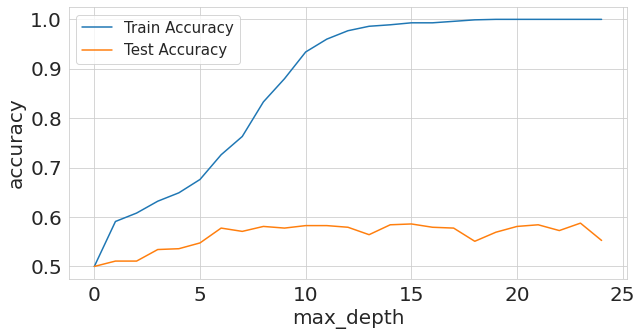

In [21]:
# Create Two Plots using Matplotlib and Seaborn
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.legend(loc='upper left', prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()